In [1]:
import pickle

FILEPATH = 'babble_LY.pkl'
with open(FILEPATH, 'rb') as f:
    Ls, Ys = pickle.load(f)

In [2]:
from metal.utils import binary_to_categorical, categorical_to_binary

Ls_bin = [categorical_to_binary(L) for L in Ls]
Ls_cat = [binary_to_categorical(L) for L in Ls]

Ys_bin = [categorical_to_binary(Y) for Y in Ys]
Ys_cat = [binary_to_categorical(Y) for Y in Ys]

In [3]:
from metal import MajorityLabelVoter, RandomVoter

print("RandomVoter")
rv = RandomVoter(seed=1, verbose=False)
_ = rv.score(Ls_cat[1], Ys_cat[1], metric='f1')
# _ = rv.score(Ls_cat[2], Ys_cat[2], metric='f1')

print("MajorityVoter")
mv = MajorityLabelVoter(seed=1, verbose=False)
_ = mv.score(Ls_cat[1], Ys_cat[1], metric='f1')
# _ = mv.score(Ls_cat[2], Ys_cat[2], metric='f1')

RandomVoter
F1: 0.131
MajorityVoter
F1: 0.369


Overwriting seed=None to seed=2
Overwriting n_epochs=100 to n_epochs=500
Overwriting l2=0.0 to l2=0.1
Overwriting print_every=10 to print_every=100
Reaffirming lr=0.01
Reaffirming show_plots=True
[Epoch 0] Loss: 64.747282
[Epoch 100] Loss: 0.421346
[Epoch 200] Loss: 0.420033
[Epoch 300] Loss: 0.419935
[Epoch 400] Loss: 0.419902
[Epoch 499] Loss: 0.419887
Finished Training
    Polarity  Coverage  Overlaps  Conflicts  Correct  Incorrect  Emp. Acc.  \
0         -1  0.904992  0.156765   0.904992     1379          0   0.928438   
1          1  0.000704  0.000704   0.000611        4          0   0.266667   
2          1  0.076269  0.076269   0.071526      489          0   0.301108   
3          1  0.001738  0.001738   0.001738       11          0   0.297297   
4          1  0.083267  0.082281   0.078711     1273          0   0.282008   
5          1  0.055229  0.055229   0.051801      742          0   0.369048   
6         -1  0.055981  0.009252   0.055981        2          0   0.998322   
7

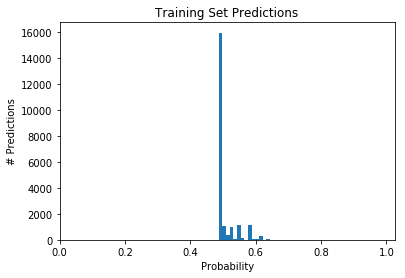

Confusion Matrix (Dev)
        y=1    y=2   
 l=1    119    488   
 l=2    70    2018   
Precision: 0.197
Recall: 0.635
F1: 0.300


In [4]:
from metal import LabelModel, ModelTuner

train_params = {
    'n_epochs': 500,
    'l2': 0.1,
    'print_every': 100,
    'lr': 0.01,
    'show_plots': True,
}
label_aggregator = LabelModel(seed=2)
label_aggregator.train(Ls[0], Y_train=Ys[0], L_dev=Ls[1], Y_dev=Ys[1], **train_params)
_ = label_aggregator.score(Ls[1], Ys[1], metric=['precision', 'recall', 'f1'])

In [5]:
search_space = {
    'n_epochs': [0, 100, 200, 500],
    'l2': [0, 0.001, 0.01, 0.1, 1],
    'print_every': 100,
    'lr': [0.01, 0.001],
}
tuner = ModelTuner(LabelModel)
init_args=[]
train_args=[Ls[0]]
model, config = tuner.search(init_args, train_args, Ls[1], Ys[1], 
                             search_space, max_search=10, metric='f1')

[1] Testing {'n_epochs': 200, 'l2': 0.1, 'lr': 0.01}
Could not find kwarg "X_dev" in default config.
Overwriting show_plots=True to show_plots=False
[Epoch 0] Loss: 120.291247
[Epoch 100] Loss: 0.421654
[Epoch 199] Loss: 0.419963
Finished Training
F1: 0.097
[2] Testing {'n_epochs': 0, 'l2': 0.01, 'lr': 0.01}
Could not find kwarg "X_dev" in default config.
Overwriting show_plots=True to show_plots=False
Finished Training
F1: 0.069
[3] Testing {'n_epochs': 500, 'l2': 1, 'lr': 0.001}
Could not find kwarg "X_dev" in default config.
Overwriting show_plots=True to show_plots=False
[Epoch 0] Loss: 94.988267
[Epoch 100] Loss: 2.185816
[Epoch 200] Loss: 2.181282
[Epoch 300] Loss: 2.181245
[Epoch 400] Loss: 2.181245
[Epoch 499] Loss: 2.181245
Finished Training
F1: 0.137
[4] Testing {'n_epochs': 200, 'l2': 0.1, 'lr': 0.001}
Could not find kwarg "X_dev" in default config.
Overwriting show_plots=True to show_plots=False
[Epoch 0] Loss: 20.682606
[Epoch 100] Loss: 0.657366
[Epoch 199] Loss: 0.485888

In [6]:
# model.score(Ls_cat[2], Ys_cat[2], metric='f1')

In [7]:
from metal.analysis import (
    error_buckets, confusion_matrix, 
    view_label_matrix, view_overlaps, view_conflicts,
    lf_summary, lf_polarities, lf_coverages, lf_overlaps, lf_conflicts
)
# est_accs = label_aggregator.accs()
est_accs = label_aggregator._alphas().numpy()
df = lf_summary(Ls[0], Ys[0], est_accs=est_accs)
df

,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.,Learned Acc.
0,-1,0.904992,0.156765,0.904992,1379,0,0.928438,0.513089
1,1,0.000704,0.000704,0.000611,4,0,0.266667,0.567486
2,1,0.076269,0.076269,0.071526,489,0,0.301108,0.535536
3,1,0.001738,0.001738,0.001738,11,0,0.297297,0.565792
4,1,0.083267,0.082281,0.078711,1273,0,0.282008,0.513856
5,1,0.055229,0.055229,0.051801,742,0,0.369048,0.523893
6,-1,0.055981,0.009252,0.055981,2,0,0.998322,0.418196
7,-1,0.000282,0.000282,0.000282,3,0,0.500000,0.431755
8,-1,0.000047,0.000047,0.000047,1,0,1.000000,0.431155
9,-1,0.003194,0.003194,0.003194,6,0,0.911765,0.435637


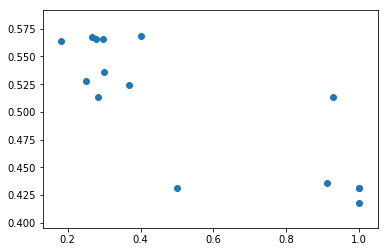

In [8]:
import matplotlib.pyplot as plt
import numpy as np
emp_acc = np.array(df['Emp. Acc.'])
lrn_acc = np.array(df['Learned Acc.'])
plt.scatter(emp_acc, lrn_acc)

### ClassHierarchy

In [9]:
# from snorkel.learning.class_hierarchy import ClassHierarchy

# task_to_lfs = {0 : range(Ls[0].shape[1])}
# ch = ClassHierarchy(Ls[0], task_to_lfs, [], [2])

In [10]:
# search_space = {
#     'l2': [0.0, 0.01, 0.1, 0.25, 0.5],
#     'step_size': [0.01],
# }

# ch.grid_search_train(
#     Ls[1],
#     Ys[1],
#     search_space=search_space,
#     score_metric='f1',
#     n_steps=500,
#     print_at=100,
# )

In [11]:
# from metal.analysis import plot_probabilities_histogram
# probs = ch.conditional_probs(ch._parse_L(Ls[1]), 0)[2]
# plot_probabilities_histogram(probs)

In [12]:
# Y_p = ch.predictions(Ls[2])

In [13]:
# from metal.metrics import metric_score

# metric_score(Ys[2], Y_p, metric='precision')
# metric_score(Ys[2], Y_p, metric='recall')
# metric_score(Ys[2], Y_p, metric='f1')

In [14]:
# ch.w_accs(0)

### Snorkel GM

In [15]:
# from snorkel.learning.gen_learning import GenerativeModel

# gm = GenerativeModel(lf_propensity=True)
# gm.train(Ls_bin[0], step_size=0.01, reg_param=0.25)

In [16]:
# from metal.analysis import plot_probabilities_histogram
# probs = gm.marginals(Ls_bin[1])
# plot_probabilities_histogram(probs)

In [17]:
# from metal.utils import binary_to_categorical
# Y_p = gm.predictions(Ls_bin[2])
# Y_p = binary_to_categorical(Y_p)

In [18]:
# from metal.metrics import metric_score

# metric_score(Ys_bin[1], Y_p, metric='precision')
# metric_score(Ys_bin[1], Y_p, metric='recall')
# metric_score(Ys_bin[1], Y_p, metric='f1')